# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from time import sleep

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        sleep(0.5)
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beringovskiy
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | casper
Processing Record 6 of Set 1 | boma
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | san felipe
Processing Record 11 of Set 1 | amahai
Processing Record 12 of Set 1 | cap-aux-meules
Processing Record 13 of Set 1 | zhangye
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | moree
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beringovskiy,63.0500,179.3167,-4.85,81,65,4.15,RU,1680140011
1,lompoc,34.6391,-120.4579,12.51,77,20,5.14,US,1680139858
2,busselton,-33.6500,115.3333,20.49,63,100,8.06,AU,1680139854
3,bethel,41.3712,-73.4140,7.10,60,0,4.63,US,1680139833
4,casper,42.8666,-106.3131,5.33,57,100,4.63,US,1680140044


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beringovskiy,63.0500,179.3167,-4.85,81,65,4.15,RU,1680140011
1,lompoc,34.6391,-120.4579,12.51,77,20,5.14,US,1680139858
2,busselton,-33.6500,115.3333,20.49,63,100,8.06,AU,1680139854
3,bethel,41.3712,-73.4140,7.10,60,0,4.63,US,1680139833
4,casper,42.8666,-106.3131,5.33,57,100,4.63,US,1680140044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

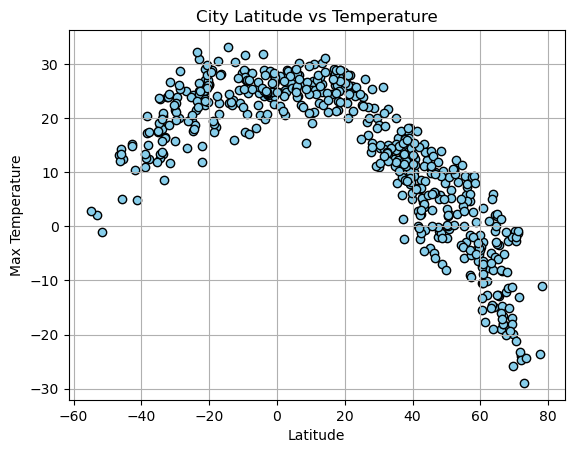

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

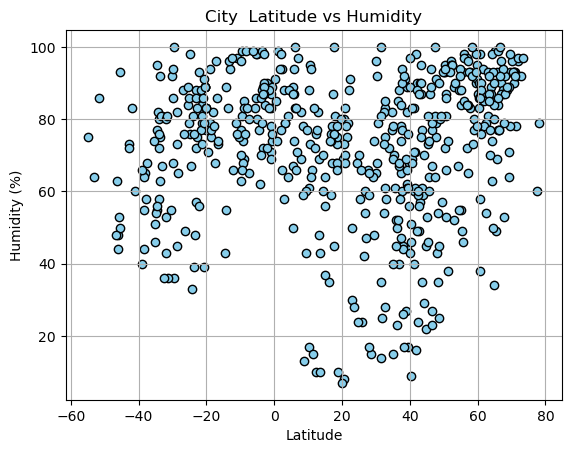

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City  Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

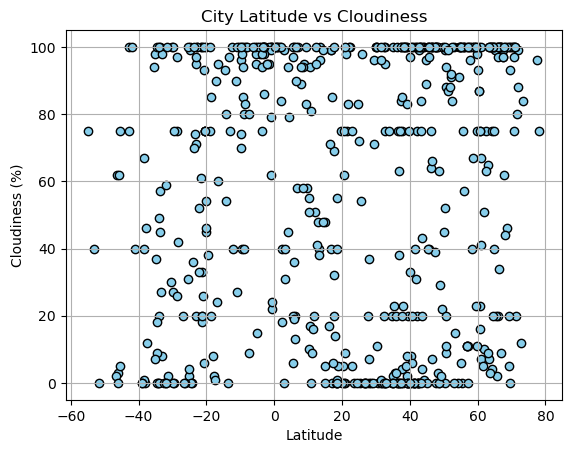

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

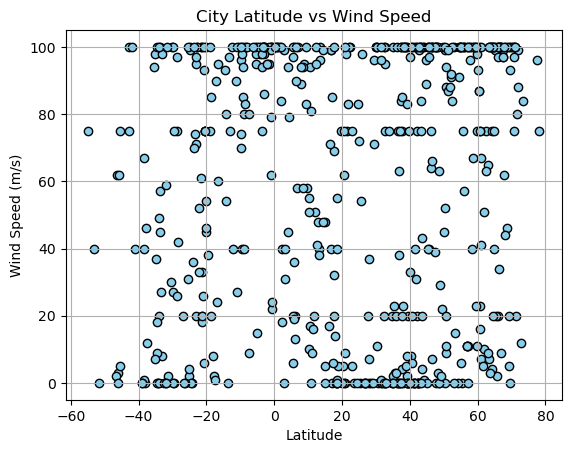

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, edgecolor="black")
    plt.plot(x_values, regress_values, color = "r")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beringovskiy,63.0500,179.3167,-4.85,81,65,4.15,RU,1680140011
1,lompoc,34.6391,-120.4579,12.51,77,20,5.14,US,1680139858
3,bethel,41.3712,-73.4140,7.10,60,0,4.63,US,1680139833
4,casper,42.8666,-106.3131,5.33,57,100,4.63,US,1680140044
5,boma,7.0805,-2.1697,22.37,97,100,1.23,GH,1680140212


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,busselton,-33.6500,115.3333,20.49,63,100,8.06,AU,1680139854
6,punta arenas,-53.1500,-70.9167,2.06,64,40,4.63,CL,1680139843
9,amahai,-3.3333,128.9167,28.31,72,100,1.45,ID,1680140215
14,puerto baquerizo moreno,-0.9000,-89.6000,26.24,78,62,2.68,EC,1680140218
15,port alfred,-33.5906,26.8910,13.43,75,45,1.79,ZA,1680139835


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9038185232103194
The correlation between both factors is -0.9


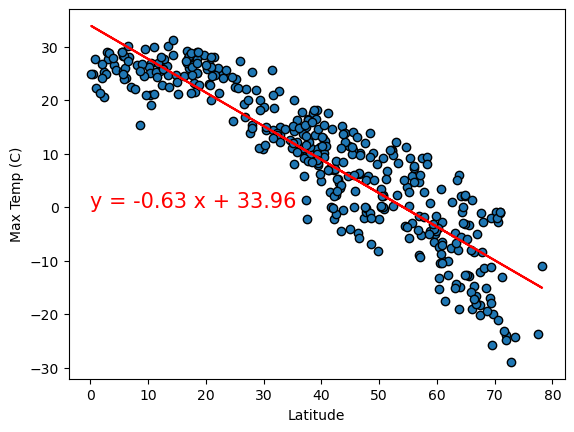

In [67]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,"Latitude", "Max Temp (C)", (0,0))


The r-value is: 0.6952181290699597
The correlation between both factors is 0.7


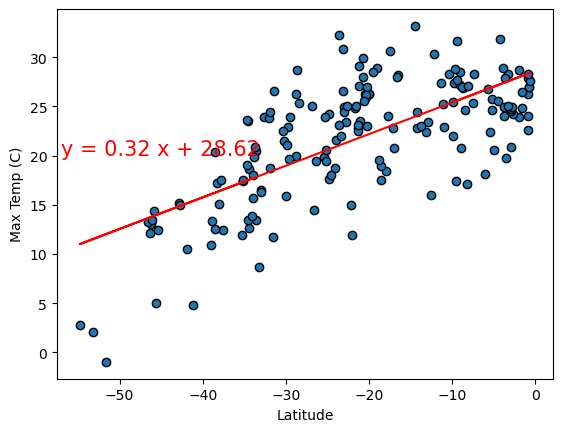

In [69]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,"Latitude", "Max Temp (C)", (-57,20))


**Discussion about the linear relationship:** Based on the correlation coeffienct we see that there are strong correlation between the maximum temperature and the latitude. For the northern hemisphere the closer one is to the equator the higher the temperature will be in that country and the father one is away from the equator it will have a lower temperature. The same goes with the southern hemisphere the closer a country is to the equator the higher the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2557018652540769
The correlation between both factors is 0.26


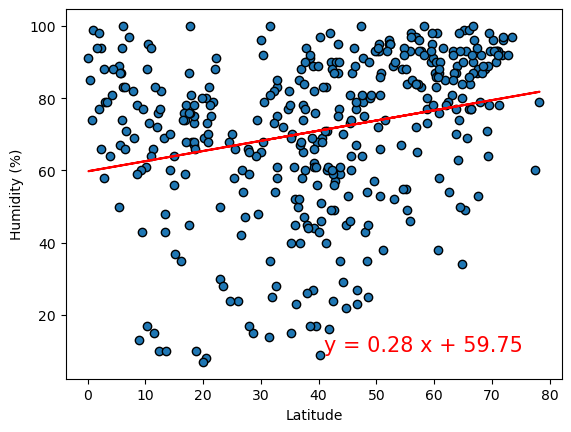

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", (41,10))

The r-value is: 0.41418857080255794
The correlation between both factors is 0.41


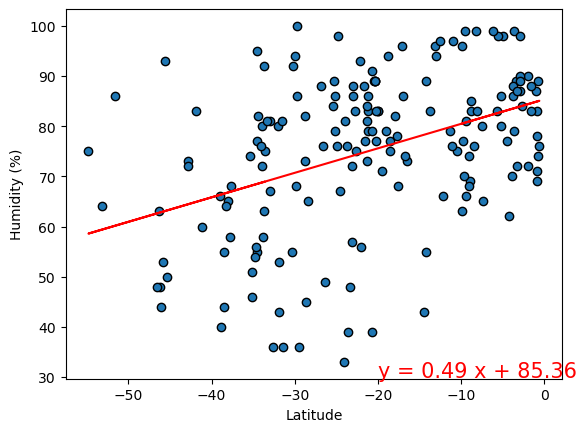

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,"Latitude", "Humidity (%)", (-20,30))

**Discussion about the linear relationship:** The correaltion between latitude and humidity is a rather weak in regards to both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1501467455613159
The correlation between both factors is 0.15


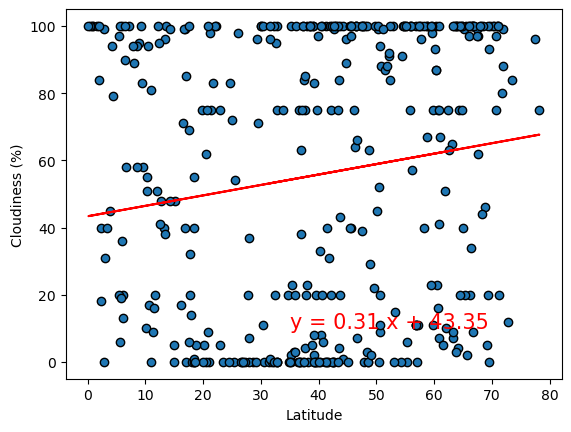

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", (35,10))

The r-value is: 0.4541541650727477
The correlation between both factors is 0.45


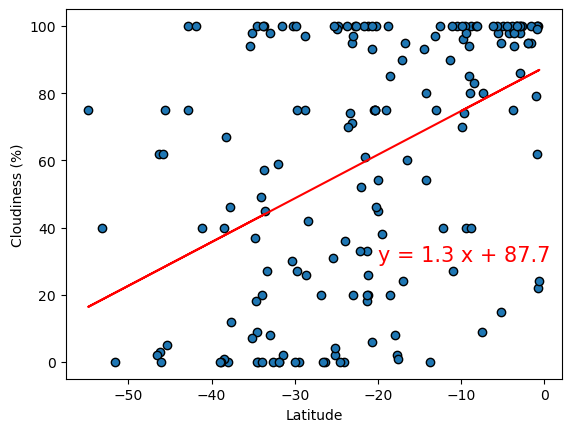

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", (-20,30))

**Discussion about the linear relationship:** Looking at the scatter plot the points are rather scattered all over and with the correlation values being weak, we can say that there is no correaltion between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.19390187493863617
The correlation between both factors is 0.19


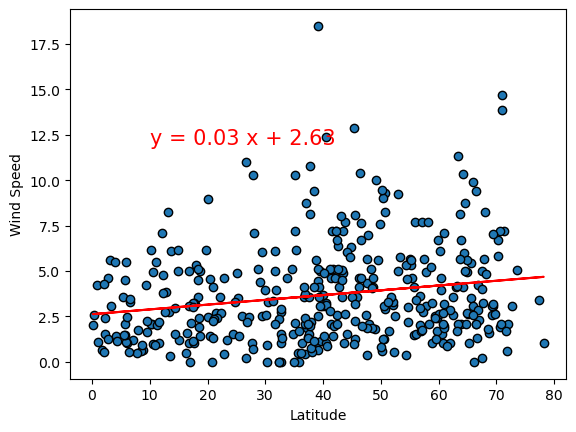

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,"Latitude", "Wind Speed", (10,12))

The r-value is: -0.3470919422165925
The correlation between both factors is -0.35


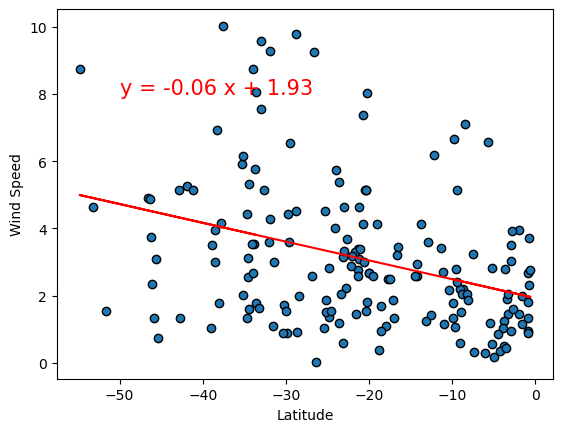

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,"Latitude", "Wind Speed", (-50,8))

**Discussion about the linear relationship:** When looking at the correlation for both scatter plots we see that there is no correlation between latitude and wind speed for the north and south hemispheres. The points to seem to be scattered however the south is more evently scattered. The northern is more focused down at wind speeds of 0 to 10 m/s, with some outliers.